In [1]:
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
sns.set(font_scale = 2)

In [4]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import numpy as np

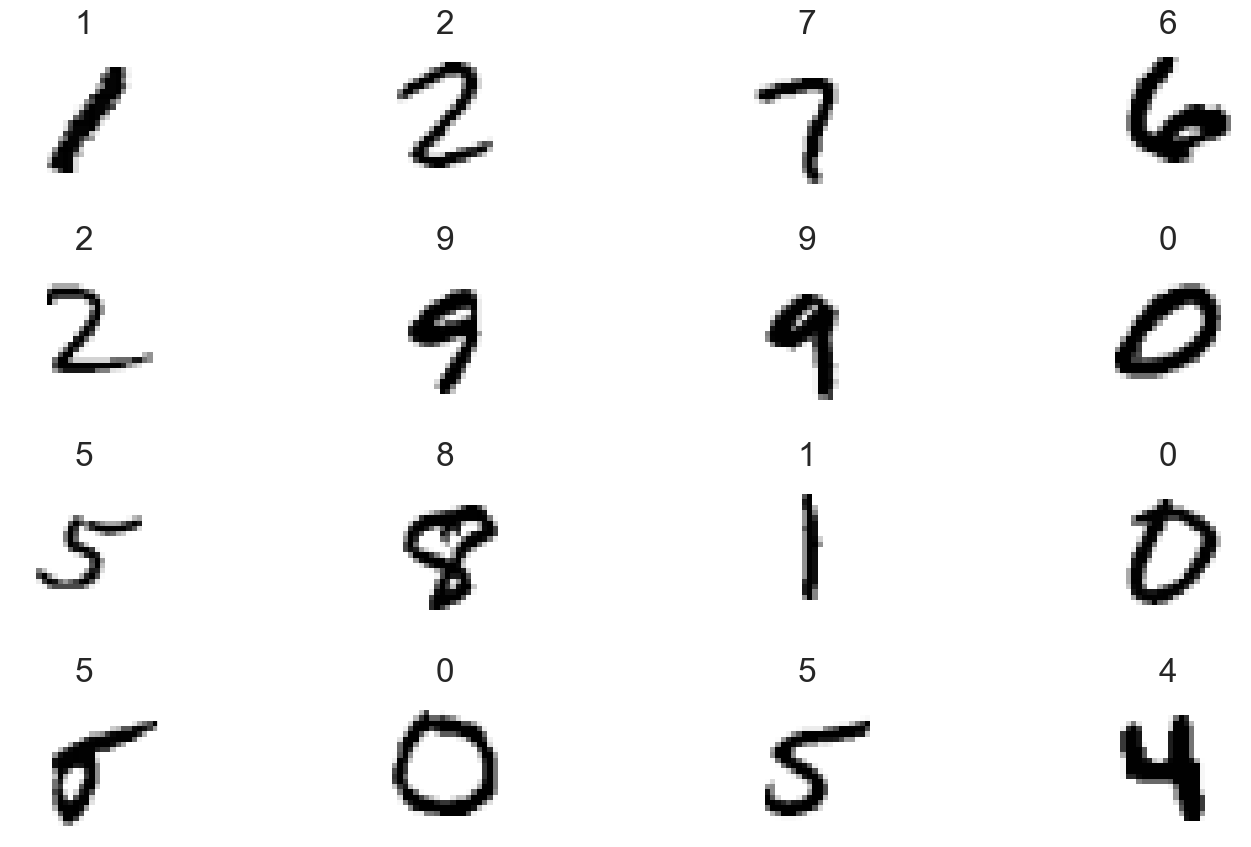

In [7]:
index = np.random.choice(np.arange(len(X_train)), 24, replace = False)
figure , axes = plt.subplots(nrows = 4, ncols = 4, figsize = (16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [8]:
## reshaping in the desired format for the cnn model 
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [9]:
## now converting the value in the range of 0 to 1 or can say doing the normalization 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
from tensorflow.keras.utils import to_categorical 

In [11]:
y_train = to_categorical(y_train)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [13]:
y_test = to_categorical(y_test)

In [14]:
cnn = Sequential()

In [15]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [16]:
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

C:\Users\divya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [18]:
cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

In [19]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [20]:
cnn.add(Flatten())

In [21]:
cnn.add(Dense(units = 128, activation = 'relu'))

In [22]:
cnn.add(Dense(units = 10, activation = 'softmax'))

In [23]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image 

In [ ]:
plot_model(cnn, to_file = 'convnet.png', show_shapes = True, show_layer_names = True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:
Image(filename = 'convnet.png')

FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

In [29]:
cnn.compile(optimizer = 'adam',
           loss = 'categorical_crossentropy', 
           metrics = ['accuracy'])

In [30]:
cnn.compile(optimizer = 'adam',
           loss = 'categorical_crossentropy',
           metrics = ['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8997 - loss: 0.3221 - val_accuracy: 0.9852 - val_loss: 0.0527
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9849 - loss: 0.0462 - val_accuracy: 0.9907 - val_loss: 0.0320
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9890 - val_loss: 0.0423
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9907 - val_loss: 0.0407


In [32]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0468


In [33]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [34]:
type(predictions)

numpy.ndarray

In [35]:
predictions[0]

array([3.0858330e-12, 2.1857870e-10, 1.9976556e-09, 1.3731529e-06,
       8.7398085e-13, 2.1914098e-10, 7.5292610e-16, 9.9999857e-01,
       4.7030774e-10, 5.6799397e-08], dtype=float32)

In [36]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
y_test[0] ## 1 at 7th position 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [38]:
for index, prob in enumerate(predictions[0]): ## here also the maximum at the 7th position
    print(f'{index}: {prob:.10%}')
    print('--------------------------------------------------------------------------------------------------------------------')

0: 0.0000000003%
--------------------------------------------------------------------------------------------------------------------
1: 0.0000000219%
--------------------------------------------------------------------------------------------------------------------
2: 0.0000001998%
--------------------------------------------------------------------------------------------------------------------
3: 0.0001373153%
--------------------------------------------------------------------------------------------------------------------
4: 0.0000000001%
--------------------------------------------------------------------------------------------------------------------
5: 0.0000000219%
--------------------------------------------------------------------------------------------------------------------
6: 0.0000000000%
--------------------------------------------------------------------------------------------------------------------
7: 99.9998569489%
--------------------------------------------

In [39]:
## thus predicting correct 

In [40]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected :
        incorrect_predictions.append(
            (i, images[i], predicted, expected)
        )

In [41]:
incorrect_predictions[0]

(184,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
     

In [42]:
len(incorrect_predictions)

116

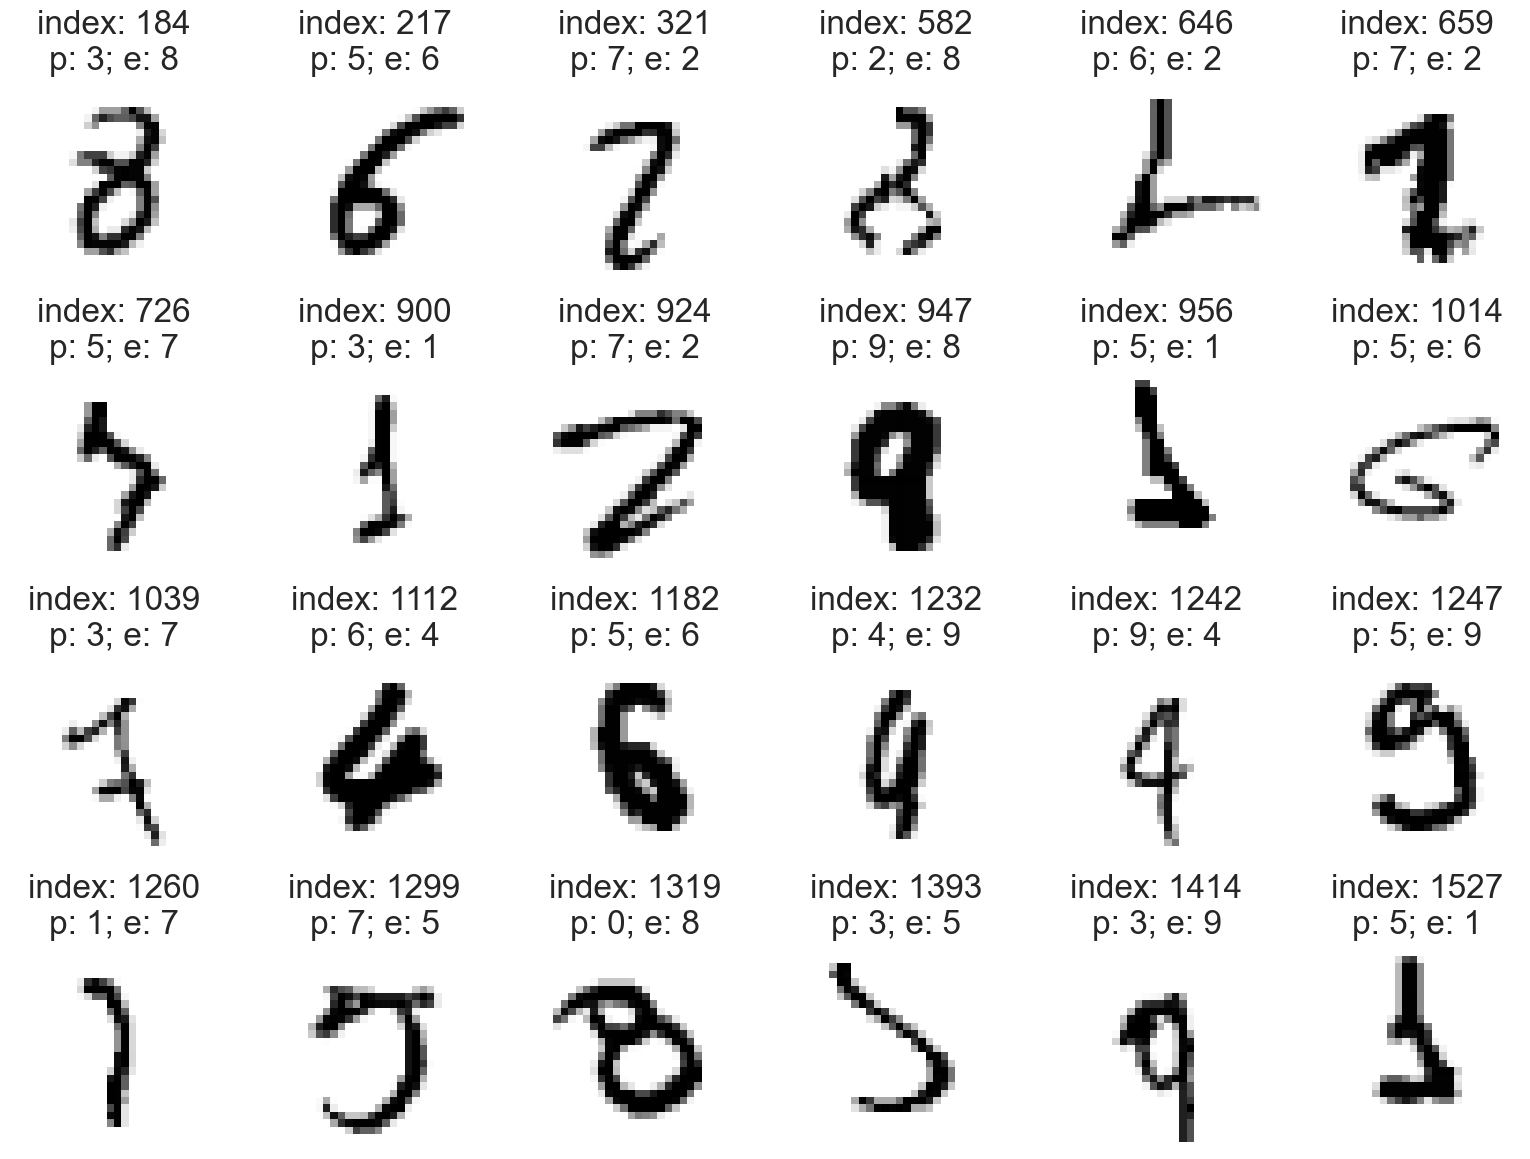

In [43]:
figure, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}'
    )
plt.tight_layout()

In [44]:
# Displaying probabilities of several incorrect predictions 
# def display_probabilities(prediction):
#     for pre in predictions:
#         for index, prob in enumerate(pre):
#             print(f'{index}: {prob:.10%}')
#         print('----------------------------------------------------------------------------------------------------------------')

In [45]:
# display_probabilities(predictions)

In [46]:
# Saving the model 

In [47]:
cnn.save('mnist_cnn.h5')

In [48]:
!mkdir logs

In [52]:
import datetime
import tensorflow as tf

In [59]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [55]:
!pip install tensorboard